In [ ]:
 #CNN:   필러링로 특성을뽑아 --> 풀링 --> dense 넣겠다 

In [ ]:
#교안 p90참조

(24, 24, 4)
<class 'numpy.ndarray'>


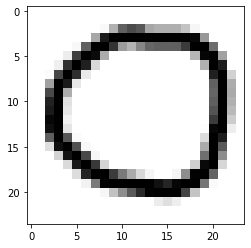

In [1]:
import matplotlib.pyplot as plt
c0 = plt.imread('data/handwriting/handwriting_shape/train/circle/circle001.png') #tab키 누르면 나옴
plt.imshow(c0) #imshow   means  imageshow
print(c0.shape)
print(type(c0))
# (24, 24, 4) 가로 세로  컬러값 

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D  # 필터링     #원래 데이터 filtering 처리 하고, 곱해서 합함
from tensorflow.keras.layers import MaxPool2D  #풀링  
from tensorflow.keras.layers import Flatten # 2차원 영상 데이터를 1차원 으로 
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator  #어떤 것은 24by 24 어떤것은 28by 28   이 funciton이 알아서 크기 조정해서 넣어즘
np.random.seed(3)


In [8]:
#1. 데이터 생성하기 
# 종속변수는 원핫인토딩
train_datagen = ImageDataGenerator(rescale = 1./255) # 정규화 작업
train_generator = train_datagen.flow_from_directory(
                        'data/handwriting/hard_handwriting_shape/train',  #이 파일안에 있는 내용 한꺼번에 들어감
                        target_size=(24,24),                      # 독립변수는 알아서 24 x 24로 가여옴
                        batch_size=3, class_mode = "categorical")  # 종속변수는 알아서 원핫인토딩
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('data/handwriting/hard_handwriting_shape/test/',
                                                 target_size=(24,24),
                                                 batch_size =3,
                                                 class_mode="categorical")

# 위 (hard_handwriting_shape/train) - 파일45개. 3개의 폴더
# 밑(handwriting/hard_handwriting_shape/test) - 파일 15개. 3개의 폴더 

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [12]:
#2. 모델 구성
model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3), activation="relu",input_shape=(24,24,3)))  #24-3+1 =22 튿성을 뽑아냄.  (24x24에서 22x22로 줄어듬)
                                    # 7x7 에서 커널사이즈  3x3하면 5x5로 줄어드임. (7-3+1=5)    #앞에 있는32는 '필터의 갯수'
model.add(Conv2D(64, kernel_size =(3,3), activation="relu" ))  #64개의 특성을 뽑아냄   # 위 단계의 input_shape를 알아서 받아서 쓰게됨
model.add(MaxPool2D(pool_size=(2,2)))  #2x2 (갯수가 4개)의 pixel이 하나로 
model.add(Flatten())  # 2차원 이미지데이터를 1차원으로
model.add(Dense(128,activation='relu'))
model.add(Dense(3 ,activation='softmax'))

In [14]:
#3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [15]:
#4. 모델 학습시키기
model.fit_generator(train_generator, steps_per_epoch= 15,
                                      epochs=50,
                                      validation_data = test_generator,
                                       validation_steps=5)  # 3개씩 step이15, 이작업을 50번 학습

Epoch 1/50
15/15 [==============================] - 2s 60ms/step - loss: 1.2450 - accuracy: 0.4050 - val_loss: 1.2664 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 12ms/step - loss: 0.4014 - accuracy: 0.7958 - val_loss: 2.4297 - val_accuracy: 0.3333
Epoch 3/50
15/15 [==============================] - 0s 12ms/step - loss: 0.1949 - accuracy: 0.8961 - val_loss: 2.4834 - val_accuracy: 0.3333
Epoch 4/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 3.3764 - val_accuracy: 0.4000
Epoch 5/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 3.7326 - val_accuracy: 0.3333
Epoch 6/50
15/15 [==============================] - 0s 13ms/step - loss: 9.8817e-04 - accuracy: 1.0000 - val_loss: 4.1251 - val_accuracy: 0.4000
Epoch 7/50
15/15 [==============================] - 0s 12ms/step - loss: 4.7152e-04 - accuracy: 1.0000 - val_loss: 4.3137 - val_accuracy: 0.4000
Epoch

In [16]:
#5. 모델 평가하기
score= model.evaluate_generator(test_generator, steps=5)
print(score)  #0방 - loss, 1방- accuracy

[6.160467147827148, 0.3333333432674408]


C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [18]:
#6. 예측하기 
pred = model.predict_generator(test_generator)
print(test_generator.class_indices)
np.set_printoptions(formatter={'float':lambda x:"{:0.2f}".format(x)})
print(pred)

{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.00 0.00 1.00]
 [0.05 0.00 0.95]
 [0.00 0.00 1.00]
 [0.00 0.01 0.99]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.43 0.00 0.57]
 [0.02 0.00 0.98]
 [0.00 0.01 0.99]
 [0.00 0.00 1.00]
 [0.79 0.01 0.21]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]]


# accuracy늘리기 
<ol>
    <li> 데이터 확보, 데이터 부풀르기 (ImageDataGenerator) </li>
   # 파일에 데이터 많이 가져오고
    # Dense 늘리고 

- 데이터 부풀리기 

In [4]:
#1. 데이터 생성하기 
# 데이터 부풀리기 
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=10,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.7, #0.7라이안 밀림
                                    zoom_range=[0.9,2.2], # 0.9배~2.2배
                                    horizontal_flip=True, # 수평방향으로 뒤집기
                                    vertical_flip=True, # 수직방향으로 뒤집기
                                    fill_mode='nearest')#이미지를 회전, 
                                    #이동하거나 축소할 때 공간을 채우는 방식


train_generator = train_datagen.flow_from_directory(
                        'data/handwriting/hand_test/train',  #이 파일안에 있는 내용 한꺼번에 들어감
                        target_size=(24,24),                      # 독립변수는 알아서 24 x 24로 가여옴
                        batch_size=3, class_mode = "categorical")  # 종속변수는 알아서 원핫인토딩





test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('data/handwriting/hand_test/test/',
                                                 target_size=(24,24),
                                                 batch_size =3,
                                                 class_mode="categorical")

# 위 (hard_handwriting_shape/train) - 파일45개. 3개의 폴더
# 밑(handwriting/hard_handwriting_shape/test) - 파일 15개. 3개의 폴더 

Found 69 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [5]:
#2. 모델 구성
model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3), activation="relu",input_shape=(24,24,3)))  #24-3+1 =22 튿성을 뽑아냄.  (24x24에서 22x22로 줄어듬)
                                    # 7x7 에서 커널사이즈  3x3하면 5x5로 줄어드임. (7-3+1=5)    #앞에 있는32는 '필터의 갯수'
model.add(Conv2D(32, kernel_size =(3,3), activation="relu" ))  #64개의 특성을 뽑아냄   # 위 단계의 input_shape를 알아서 받아서 쓰게됨
model.add(MaxPool2D(pool_size=(2,2)))  #2x2 (갯수가 4개)의 pixel이 하나로 
#*******************추가된 내용************************************
model.add(Dropout(0.1))  
model.add(Conv2D(64,kernel_size=(3,3), activation="relu"))  #이제 64개씩 뽑아내 필터
model.add(Conv2D(64,kernel_size=(3,3), activation="relu"))  #풀링사이즈 보통 짝수.
model.add(MaxPool2D(pool_size=(2,2)))  #2x2 에서 제일 큰 값만 뽑아 이미지 축소)
model.add(Dropout(0.1))  
#*******************************************************
model.add(Flatten())  # 2차원 이미지데이터를 1차원으로
model.add(Dense(128,activation='relu'))
model.add(Dense(3 ,activation='softmax'))

In [6]:
#3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

#4. 모델 학습시키기
model.fit_generator(train_generator, steps_per_epoch= 15,
                                      epochs=50,
                                      validation_data = test_generator,
                                       validation_steps=5)  # 3개씩 step이15, 이작업을 50번 학습
#5. 모델 평가하기
score= model.evaluate_generator(test_generator, steps=5)
print(score)  #0방 - loss, 1방- accuracy

#6. 예측하기 
pred = model.predict_generator(test_generator)
print(test_generator.class_indices)
np.set_printoptions(formatter={'float':lambda x:"{:0.2f}".format(x)})
print(np.argmax(pred, axis=1))  #np.argmax 추가 

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
15/15 [==============================] - 1s 45ms/step - loss: 1.1303 - accuracy: 0.3666 - val_loss: 1.1008 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 11ms/step - loss: 1.0806 - accuracy: 0.5172 - val_loss: 1.1012 - val_accuracy: 0.3333
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 1.0845 - accuracy: 0.4502 - val_loss: 1.0946 - val_accuracy: 0.3333
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 1.0928 - accuracy: 0.3223 - val_loss: 1.0913 - val_accuracy: 0.4000
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 1.0954 - accuracy: 0.3414 - val_loss: 1.0759 - val_accuracy: 0.4667
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 1.0318 - accuracy: 0.4145 - val_loss: 0.9950 - val_accuracy: 0.4667
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 1.0182 - accuracy: 0.4259 - val_loss: 0.8811 - val_accuracy: 0.6667
Epoch 8/50
15/15

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


{'circle': 0, 'rectangle': 1, 'triangle': 2}
[0 1 0 0 0 0 0 0 2 2 1 2 2 2 2]
